In [13]:
import pickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
# sns.set_style("whitegrid")
from matplotlib import rc
rc('text', usetex=False)

%load_ext autoreload
%autoreload 2

from plot import smooth_plot,plot_curve,parse_loss_traj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


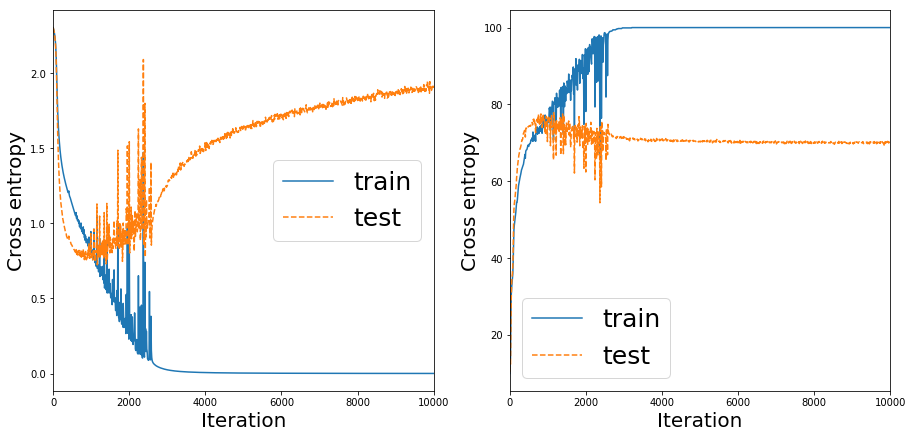

In [19]:
traj_gd = parse_loss_traj('../experiments/fashionmnist_gd/loss.pkl')


plt.figure(figsize=(15,7))
plt.subplot(1,2,1); 
plt.plot(traj_gd[0],traj_gd[1],'-',label='train')
plt.plot(traj_gd[0],traj_gd[3],'--',label='test')
plt.xlim([0,10000])
plt.ylabel(r'Cross entropy',fontsize=20)
plt.xlabel(r'Iteration',fontsize=20)
plt.legend(fontsize=25)

plt.subplot(1,2,2); 
plt.plot(traj_gd[0],traj_gd[2],'-',label='train')
plt.plot(traj_gd[0],traj_gd[4],'--',label='test')
plt.xlim([0,10000])
plt.ylabel(r'Cross entropy',fontsize=20)
plt.xlabel(r'Iteration',fontsize=20)
plt.legend(fontsize=25)

# plt.savefig('result/figs/fashionmnist_fullbatch1200_train.pdf',bbox_inches='tight')

In [20]:
traj_sgd = parse_loss_traj('../experiments/fashionmnist_gd2sgd/loss.pkl')

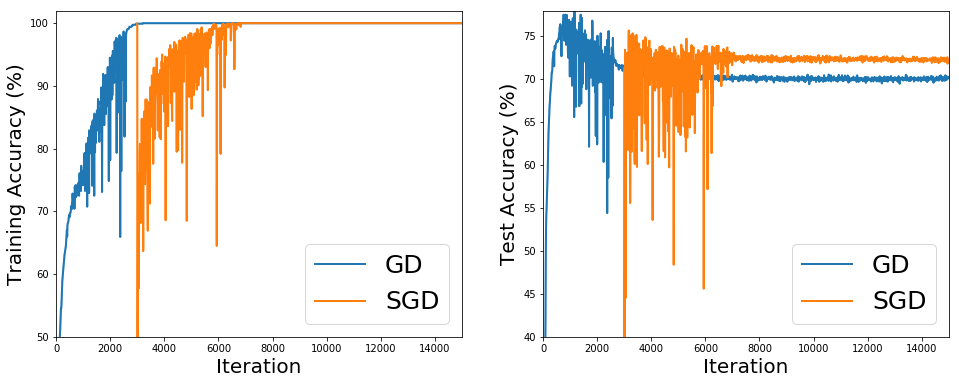

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1);
plot_curve(curve_list=[(traj_gd[0],traj_gd[2]),
            (traj_sgd[0],traj_sgd[2])], 
           labels=['GD','SGD'],
           xlabel=r'Iteration',
           ylabel=r'Training Accuracy (%)',
           smooth_width=1,
           lw=2,
           xlim=[0,15000],
           ylim=[50,102]
        )


plt.subplot(1,2,2); 
plot_curve(curve_list=[(traj_gd[0],traj_gd[4]),
            (traj_sgd[0],traj_sgd[4])], 
           labels=['GD','SGD'],
           xlabel=r'Iteration',
           ylabel=r'Test Accuracy (%)',
           smooth_width=1,
           lw=2,
           xlim=[0,15000],
           ylim=[40,78]
        )

plt.savefig('figs/fashionmnist_gd2sgd_3000_lr0.05_vanilla.pdf',bbox_inches='tight')

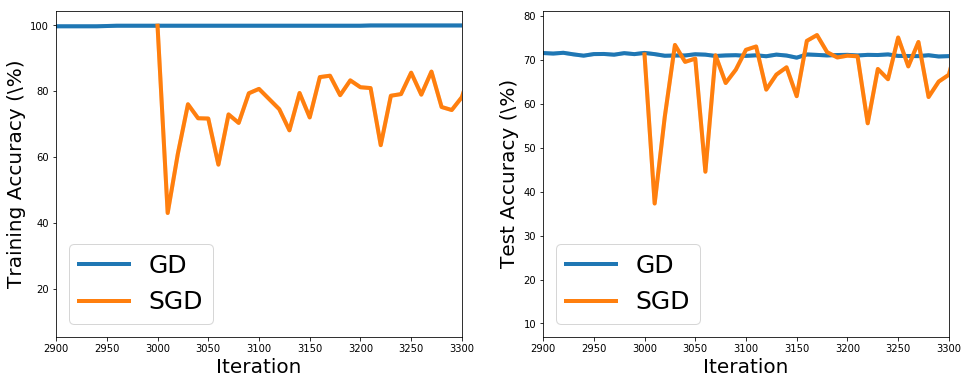

In [24]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1);
plot_curve(curve_list=[(traj_gd[0],traj_gd[2]),
            (traj_sgd[0],traj_sgd[2])], 
           labels=['GD','SGD'],
           xlabel=r'Iteration',
           ylabel=r'Training Accuracy (\%)',
           xlim=[2900,3300]
        )


plt.subplot(1,2,2); 
plot_curve(curve_list=[(traj_gd[0],traj_gd[4]),
            (traj_sgd[0],traj_sgd[4])], 
           labels=['GD','SGD'],
           xlabel=r'Iteration',
           ylabel=r'Test Accuracy (\%)',
           xlim=[2900,3300]
        )

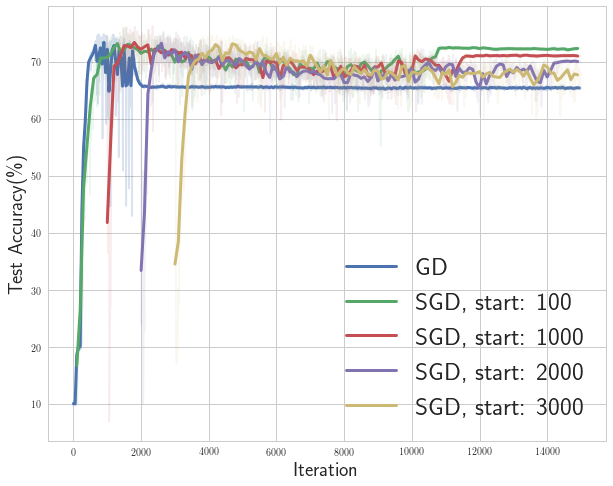

In [224]:
plt.figure(figsize=(10,8))
smooth_plot(plt,traj_gd[0],traj_gd[4], alpha=0.2, lw=4,label=r'GD')
smooth_plot(plt,traj_sgd100[0],traj_sgd100[4],alpha=0.1,lw=4,label=r'SGD, start: 100')
smooth_plot(plt,traj_sgd1000[0],traj_sgd1000[4],alpha=0.1,lw=4,label=r'SGD, start: 1000')
smooth_plot(plt,traj_sgd2000[0],traj_sgd2000[4],alpha=0.1,lw=4,label=r'SGD, start: 2000')
smooth_plot(plt,traj_sgd3000[0],traj_sgd3000[4],alpha=0.1,lw=4,label=r'SGD, start: 3000')
plt.legend(fontsize=25)
plt.xlabel(r'Iteration',fontsize=20)
plt.ylabel(r'Test Accuracy(\%)',fontsize=20)
plt.xlim([0,15000])
plt.ylim([40,80])
plt.savefig('result/figs/fashionmnist_varying_restartpoint.pdf',bbox_inches='tight')

## FashionMNIST: Escape Process

In [273]:
data = pickle.load(open('result/data/mnist_resfnn_zoomin_start2000.pkl','rb'))
traj_gd = get_traj(data,1200,0)
traj_sgd2000 = get_traj(data,20,2000)
traj_sgd = traj_sgd2000

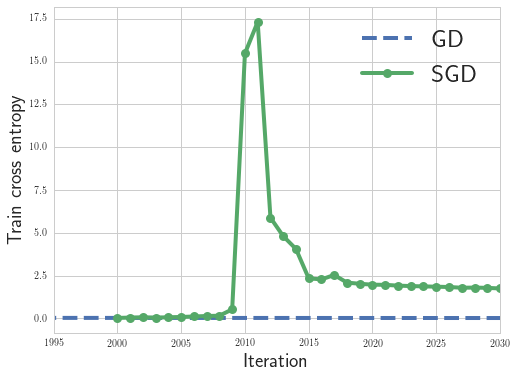

In [281]:
plt.figure(figsize=(8,6))
plt.plot(traj_gd[0],traj_gd[1],'--',lw=4,label=r'GD')
plt.plot(traj_sgd[0],traj_sgd[1],'-o',lw=4,markersize=9,label=r'SGD')
plt.xlim([1995,2030])
plt.ylabel(r'Train cross entropy',fontsize=20)
plt.xlabel(r'Iteration',fontsize=20)
plt.legend(loc=1,fontsize=25)

plt.savefig('result/figs/fashionmnist_batchsize1200TO20_start2000_zoomin_train.pdf',bbox_inches='tight')

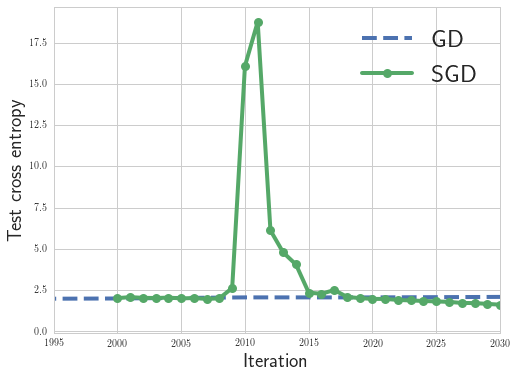

In [282]:
plt.figure(figsize=(8,6))
plt.plot(traj_gd[0],traj_gd[3],'--',lw=4,label=r'GD')
plt.plot(traj_sgd[0],traj_sgd[3],'-o',lw=4,markersize=9,label=r'SGD')
plt.xlim([1995,2030])
plt.ylabel(r'Test cross entropy',fontsize=20)
plt.xlabel(r'Iteration',fontsize=20)
plt.legend(loc=1,fontsize=25)

plt.savefig('result/figs/fashionmnist_batchsize1200TO20_start2000_zoomin_test.pdf',bbox_inches='tight')

## FashionMNIST without random labels
- clean 1000
- wrong 0
- full batch 1000
- SGD: batch size = 20

In [258]:
data = pickle.load(open('result/data/mnist_resfnn_nsamples_1000_nwrong_0.pkl','rb'))
traj_gd = get_traj(data,1000,0)
traj_sgd1000 = get_traj(data,20,1000)
traj_sgd = traj_sgd1000

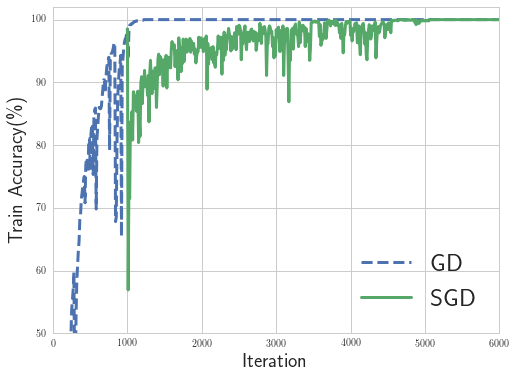

In [270]:
plt.figure(figsize=(8,6))
plt.plot(traj_gd[0],traj_gd[2],'--',lw=3,label=r'GD')
plt.plot(traj_sgd[0],traj_sgd[2],'-',lw=3,label=r'SGD')
plt.ylabel(r'Train Accuracy(\%)',fontsize=20)
plt.xlabel(r'Iteration',fontsize=20)
plt.legend(fontsize=25)
plt.ylim([50,102])
plt.xlim([0,6000])
plt.savefig('result/figs/fashionmnist_train_acc_start2000_nwrong0.pdf',bbox_inches='tight')

# plt.subplot(1,2,2); 


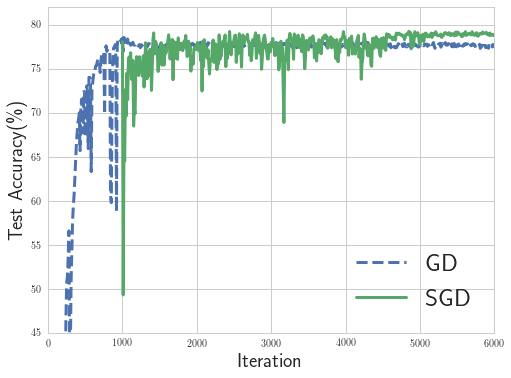

In [269]:
plt.figure(figsize=(8,6))
plt.plot(traj_gd[0],traj_gd[4],'--',lw=3,label=r'GD')
plt.plot(traj_sgd[0],traj_sgd[4],'-',lw=3,label=r'SGD')
plt.ylabel(r'Test Accuracy(\%)',fontsize=20)
plt.xlabel(r'Iteration',fontsize=20)
plt.ylim([45,82])
plt.xlim([0,6000])
plt.legend(fontsize=25)
plt.savefig('result/figs/fashionmnist_test_acc_start2000_nwrong0.pdf',bbox_inches='tight')

# Switch From Gradient Descent to SGD

In [290]:
data = pickle.load(open('result/data/mnist_resfnn.pkl','rb'))
traj_sgd = get_traj(data,20,0)
traj_gd3000 = get_traj(data,1200,3000)
traj_gd5000 = get_traj(data,1200,5000)
traj_gd7000 = get_traj(data,1200,7000)
traj_gd10000 = get_traj(data,1200,10000)

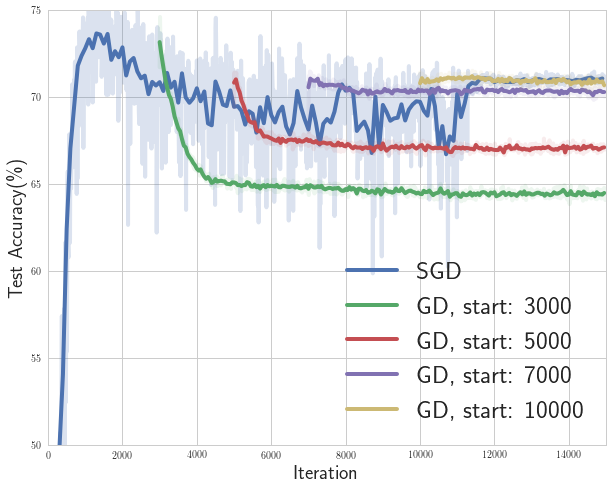

In [313]:
plt.figure(figsize=(10,8))
smooth_plot(plt,traj_sgd[0],traj_sgd[4], alpha=0.2, lw=4,label=r'SGD')
smooth_plot(plt,traj_gd3000[0],traj_gd3000[4],5,alpha=0.1,lw=4,label=r'GD, start: 3000')
smooth_plot(plt,traj_gd5000[0],traj_gd5000[4],5,alpha=0.1,lw=4,label=r'GD, start: 5000')
smooth_plot(plt,traj_gd7000[0],traj_gd7000[4],5,alpha=0.1,lw=4,label=r'GD, start: 7000')
smooth_plot(plt,traj_gd10000[0],traj_gd10000[4],5,alpha=0.1,lw=4,label=r'GD, start: 10000')
plt.legend(fontsize=25)
plt.xlabel(r'Iteration',fontsize=20)
plt.ylabel(r'Test Accuracy(\%)',fontsize=20)
plt.xlim([0,15000])
plt.ylim([50,75])
plt.savefig('result/figs/fashionmnist_gd2sgd_varing_startpoint_test.pdf',bbox_inches='tight')

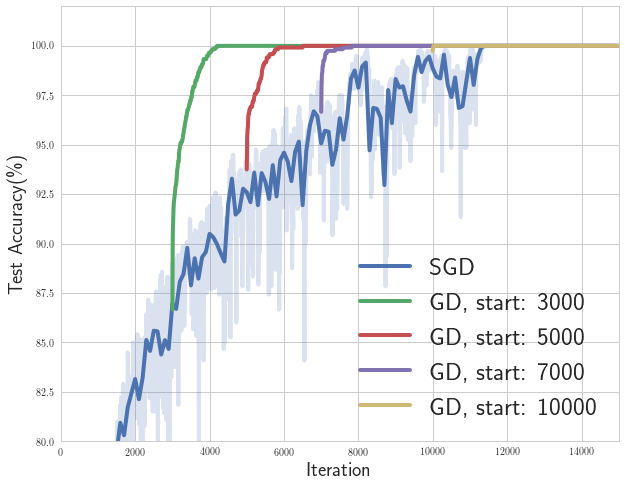

In [309]:
plt.figure(figsize=(10,8))
smooth_plot(plt,traj_sgd[0],traj_sgd[2], alpha=0.2, lw=4,label=r'SGD')
smooth_plot(plt,traj_gd3000[0],traj_gd3000[2],1,alpha=0.1,lw=4,label=r'GD, start: 3000')
smooth_plot(plt,traj_gd5000[0],traj_gd5000[2],1,alpha=0.1,lw=4,label=r'GD, start: 5000')
smooth_plot(plt,traj_gd7000[0],traj_gd7000[2],1,alpha=0.1,lw=4,label=r'GD, start: 7000')
smooth_plot(plt,traj_gd10000[0],traj_gd10000[2],1,alpha=0.1,lw=4,label=r'GD, start: 10000')
plt.legend(fontsize=25)
plt.xlabel(r'Iteration',fontsize=20)
plt.ylabel(r'Test Accuracy(\%)',fontsize=20)
plt.xlim([0,15000])
plt.ylim([80,102])
plt.savefig('result/figs/fashionmnist_gd2sgd_varying_starpoint_train.pdf',bbox_inches='tight')